In [1]:
from intermine.webservice import Service
service = Service("https://yeastmine.yeastgenome.org:443/yeastmine/service")
query = service.new_query("Protein")
query.add_view(
    "genes.primaryIdentifier", "genes.secondaryIdentifier", "symbol", "length",
    "molecularWeight", "pI", "genes.featureType", "genes.sgdAlias",
    "genes.description"
)
query.add_sort_order("Protein.symbol", "ASC")
query.add_constraint("genes.featureType", "=", "intein_encoding_region", code = "H")
query.add_constraint("genes.featureType", "=", "blocked_reading_frame", code = "E")
query.add_constraint("genes.qualifier", "!=", "Dubious", code = "B")
query.add_constraint("genes.qualifier", "IS NULL", code = "C")
query.add_constraint("genes.status", "=", "Active", code = "D")
query.add_constraint("genes.featureType", "=", "ORF", code = "F")
query.add_constraint("genes.featureType", "=", "transposable_element_gene", code = "G")
query.add_constraint("organism.name", "=", "Saccharomyces cerevisiae", code = "A")
query.set_logic("A and (B or C) and D and (F or G or E or H)")

#for row in query.rows():
#    if row["length"] > 1500:
#        print (row["genes.primaryIdentifier"], row["genes.secondaryIdentifier"], row["symbol"], row["length"])

sc_prot_length = []
for row in query.rows():
    #print (row["length"])
    sc_prot_length.append(row["length"])

#max(sc_prot_length)
len(sc_prot_length)

6012

In [2]:
from Bio import SeqIO

# Fly
records = []
for record in SeqIO.parse("uniprot-proteomeUP000000803.fasta", "fasta"):
    records.append(record)

fly_prot_length = []
for record in records:
    #print (len(record.seq))
    fly_prot_length.append(len(record.seq))
    
print(len(fly_prot_length))


# Arabidopsis
records = []
for record in SeqIO.parse("TAIR9_pep_20090619.fa", "fasta"):
    records.append(record)

thale_cress_prot_length = []
for record in records:
    #print (len(record.seq))
    thale_cress_prot_length.append(len(record.seq))
    
print(len(thale_cress_prot_length))

21938
33410


In [3]:
import pandas as pd
'''
df = pd.DataFrame([thale_cress_prot_length, fly_prot_length, sc_prot_length], ['thale_cress', 'fly', 'yeast']).T # based on
# https://stackoverflow.com/a/46431740/8508004
'''
prot_length = thale_cress_prot_length + fly_prot_length + sc_prot_length
organism = (["thale_cress"] * len(thale_cress_prot_length) + 
            ["fly"] * len(fly_prot_length) + 
            ["yeast"] * len(sc_prot_length))
df = pd.DataFrame(list(zip(prot_length, organism)), columns=['length', 'organism'])
df.head()

,length,organism
0,347,thale_cress
1,672,thale_cress
2,182,thale_cress
3,578,thale_cress
4,353,thale_cress


In [4]:
df.max(0).length

22949

<IPython.core.display.Javascript object>


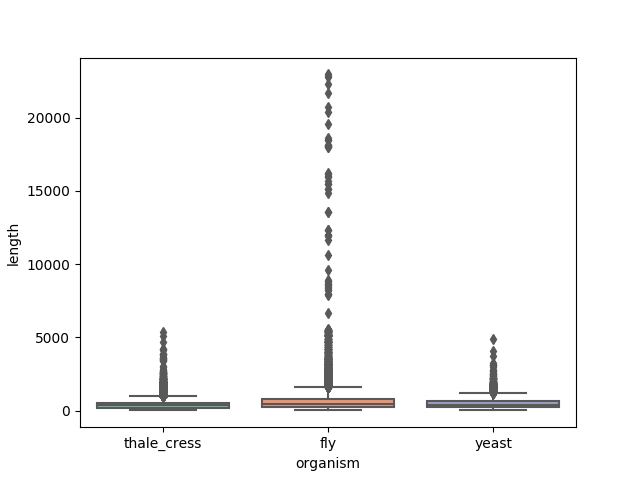

In [7]:
%matplotlib notebook
import seaborn as sns
ax = sns.boxplot(x="organism", y="length", data=df, palette="Set2")
#ax = sns.swarmplot(x="organism", y="length", data=df, color=".25")

<IPython.core.display.Javascript object>


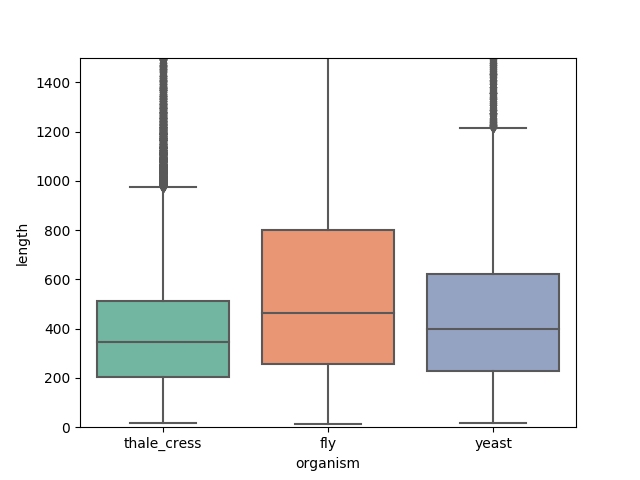

In [6]:
%matplotlib notebook
ax2 = sns.boxplot(x="organism", y="length", data=df, palette="Set2")
ax2.set(ylim=(0,1500));